In [1]:
import os
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import pearsonr

In [2]:
def age_debiasing(predicted_ages, chronological_ages):
    
    predicted_ages = predicted_ages.to_numpy()
    chronological_ages = chronological_ages.to_numpy()
    
    ones = np.ones(len(chronological_ages))
    chronological_ages_squared = np.square(chronological_ages)
    chronological_ages_confounds = np.array([ones, chronological_ages])
    
    ones_predicted = np.ones(len(predicted_ages))
    predicted_ages_squared = np.square(predicted_ages)
    predicted_ages_confounds = np.array([ones_predicted, predicted_ages])
    
    predicted_ages = np.reshape(predicted_ages, (len(predicted_ages), 1) )
    beta = np.dot( np.linalg.pinv(chronological_ages_confounds.T), predicted_ages )

    corrected_predicted_ages = (predicted_ages.flatten() - beta[0])/beta[1]
    
    return corrected_predicted_ages

def age_deconfounding3(predicted_ages, chronological_ages):
    
    x = predicted_ages.to_numpy()
    y = chronological_ages.to_numpy()
    
    grot = np.dot(np.linalg.pinv([y.flatten()**3, y.flatten()**2, y.flatten(), np.ones(len(y))]).T,x);  # estimate the debiasing parameters
    a_est=grot[3]  # you can see these are v close to what they should be
    b_est=grot[2]
    c_est=grot[1]
    d_est=grot[0]

    print(c_est, d_est)
    
    step=0.1
    extrap = 0
    minY = y.min()-extrap
    maxY = y.max()+extrap
    steps = int((y.max() - y.min()) / step + 1)
    Y = np.linspace(minY, maxY, steps)
    print(Y.shape)
    X = a_est + b_est*Y + c_est*Y**2 + d_est*Y**3
    x_debiased = np.copy(x)
    for i in range(len(x)):
        j = np.where( np.abs(x[i]-X) == np.min(np.abs(x[i]-X)) )
        print(j)
        j = j[0]
        x_debiased[i] = Y[j]
        
    return x_debiased

In [3]:
T1L_large_HGL="81"
T1L_large_SFCN="80"
T1L_large_SFCN_50b="95"
T1L_large_SFCN_50b10s="100"

T1L_HGL="45"
T1L_SFCN="27"
T1L_SFCN_50b="91"
T1L_SFCN_50b10s="96"

T1NL_HGL="52"
T1NL_SFCN="49"
T1NL_SFCN_50b="92"
T1NL_SFCN_50b10s="97"


T2NL_HGL="53"
T2NL_SFCN="50"
T2NL_SFCN_50b="93"
T2NL_SFCN_50b10s="98"

tracts_HGL="54"
tracts_SFCN="51"
tracts_SFCN_50b="94"
tracts_SFCN_50b10s="99"


dfs = [
    
T1L_large_HGL,
T1L_large_SFCN,
T1L_large_SFCN_50b,
T1L_large_SFCN_50b10s,

T1L_HGL,
T1L_SFCN, 
T1L_SFCN_50b,
T1L_SFCN_50b10s,
    
T1NL_HGL,
T1NL_SFCN,   
T1NL_SFCN_50b,    
T1NL_SFCN_50b10s,
    
T2NL_HGL,
T2NL_SFCN,    
T2NL_SFCN_50b,    
T2NL_SFCN_50b10s,
    
tracts_HGL,
tracts_SFCN,
tracts_SFCN_50b,
tracts_SFCN_50b10s,

    
]

names = [

'T1L_large_HGL',
'T1L_large_SFCN',
'T1L_large_SFCN_50b',
'T1L_large_SFCN_50b10s',

'T1L_HGL',
'T1L_SFCN', 
'T1L_SFCN_50b',
'T1L_SFCN_50b10s',
    
'T1NL_HGL',
'T1NL_SFCN',   
'T1NL_SFCN_50b',    
'T1NL_SFCN_50b10s',
    
'T2NL_HGL',
'T2NL_SFCN',    
'T2NL_SFCN_50b',    
'T2NL_SFCN_50b10s',
    
'tracts_HGL',
'tracts_SFCN',
'tracts_SFCN_50b',
'tracts_SFCN_50b10s',

    

]

# dfs1= []

# dfs1 = dfs.copy()

# for idx in range(len(dfs)):
    
#     dfs1[idx] = '../predictions/AM0-' + dfs1[idx] + '_predictions/output_statistics_test.csv'
    
# for idx in range(len(dfs)):
#     dfs1[idx] = pd.read_csv(dfs1[idx])
    
dfs1 = []

dfs1 = dfs.copy()

for idx in range(len(dfs)):
    
    dfs1[idx] = '../predictions/AM0-' + dfs1[idx] + '_predictions/output_statistics_test.csv'
    
for idx in range(len(dfs)):
    dfs1[idx] = pd.read_csv(dfs1[idx])

In [4]:
# for idx in range(len(dfs)):
#     dfs[idx] = pd.merge(dfs1[idx], dfs2[idx], on='Unnamed: 0', how='inner')
#     dfs[idx] = pd.merge(dfs[idx], dfs3[idx], on='Unnamed: 0', how='inner')
    
#     dfs[idx].rename({
#         'target_age_x': 'target_age_original',
#         'output_age_x': 'output_age_1',
#         'age_delta_x': 'age_delta_1',
#         'loss_x': 'loss_1',
#         'target_age_y': 'target_age_2',
#         'output_age_y': 'output_age_2',
#         'age_delta_y': 'age_delta_2',
#         'loss_y': 'loss_2',
#         'target_age': 'target_age_3',
#         'output_age': 'output_age_3',
#         'age_delta': 'age_delta_3',
#         'loss': 'loss_3',
#     }, axis=1, inplace=True)
    
#     dfs[idx].drop(['target_age_2', 'target_age_3'], axis=1, inplace=True)
    
#     dfs[idx].rename({
#         'target_age_original': 'target_age',
#     }, axis=1, inplace=True)
    
#     dfs[idx]['mean_output_age'] = dfs[idx][['output_age_1', 'output_age_2', 'output_age_3']].mean(axis=1)
#     dfs[idx]['mean_age_delta'] = dfs[idx]['mean_output_age'] - dfs[idx]['target_age']

In [5]:
for idx in range(len(dfs)):
    if 'output_label' in dfs1[idx].columns:
        dfs1[idx].drop(['output_label', 'target_label'], axis=1, inplace=True)
        
# not really >mean<, but makes subsequent pipeline easier to do
        
for idx in range(len(dfs)):
    dfs1[idx].rename({
        'output_age': 'mean_output_age',
        'age_delta': 'mean_age_delta'
    }, axis=1, inplace=True)

In [6]:
dfs = dfs1

In [7]:
dfs[0].head()

,Unnamed: 0,target_age,mean_output_age,mean_age_delta,loss
0,24806531,67.670662,65.482110,2.188553,4.789764
1,24237795,77.280936,73.253136,4.027800,16.223176
2,24748274,58.301941,55.103355,3.198585,10.230947
3,25463415,58.056694,61.257590,-3.200897,10.245743
4,25313661,59.653082,55.859596,3.793486,14.390536


In [8]:
for idx in range(len(dfs)):    
    dfs[idx]['output_age_decon'] = age_debiasing(dfs[idx].mean_output_age, dfs[idx].target_age)
    dfs[idx]['output_age_decon3'] = age_deconfounding3(dfs[idx].mean_output_age, dfs[idx].target_age)
    dfs[idx]['age_delta_decon'] = dfs[idx].output_age_decon - dfs[idx].target_age
    dfs[idx]['age_delta_decon3'] = dfs[idx].output_age_decon3 - dfs[idx].target_age

0.10187018469796666 -0.0005363649082331581
(358,)
(array([202]),)
(array([303]),)
(array([76]),)
(array([153]),)
(array([87]),)
(array([36]),)
(array([26]),)
(array([223]),)
(array([159]),)
(array([230]),)
(array([16]),)
(array([202]),)
(array([79]),)
(array([0]),)
(array([75]),)
(array([126]),)
(array([53]),)
(array([170]),)
(array([200]),)
(array([52]),)
(array([215]),)
(array([109]),)
(array([108]),)
(array([75]),)
(array([116]),)
(array([191]),)
(array([286]),)
(array([145]),)
(array([250]),)
(array([195]),)
(array([213]),)
(array([222]),)
(array([293]),)
(array([141]),)
(array([357]),)
(array([325]),)
(array([164]),)
(array([0]),)
(array([9]),)
(array([190]),)
(array([155]),)
(array([101]),)
(array([87]),)
(array([113]),)
(array([242]),)
(array([113]),)
(array([174]),)
(array([200]),)
(array([90]),)
(array([77]),)
(array([0]),)
(array([191]),)
(array([115]),)
(array([214]),)
(array([18]),)
(array([67]),)
(array([164]),)
(array([120]),)
(array([274]),)
(array([267]),)
(array([167])

(array([183]),)
(array([272]),)
(array([273]),)
(array([257]),)
(array([99]),)
(array([68]),)
(array([86]),)
(array([117]),)
(array([198]),)
(array([144]),)
(array([124]),)
(array([120]),)
(array([101]),)
(array([144]),)
(array([46]),)
(array([89]),)
(array([357]),)
(array([169]),)
(array([179]),)
(array([269]),)
(array([286]),)
(array([138]),)
(array([158]),)
(array([220]),)
(array([188]),)
(array([286]),)
(array([289]),)
(array([292]),)
(array([174]),)
(array([132]),)
(array([233]),)
(array([127]),)
(array([245]),)
(array([286]),)
(array([215]),)
(array([247]),)
(array([215]),)
(array([0]),)
(array([263]),)
(array([299]),)
(array([169]),)
(array([102]),)
(array([174]),)
(array([79]),)
(array([244]),)
(array([188]),)
(array([39]),)
(array([117]),)
(array([113]),)
(array([278]),)
(array([105]),)
(array([153]),)
(array([128]),)
(array([78]),)
(array([330]),)
(array([212]),)
(array([77]),)
(array([67]),)
(array([284]),)
(array([140]),)
(array([357]),)
(array([85]),)
(array([154]),)
(arra

(array([153]),)
(array([153]),)
(array([5]),)
(array([259]),)
(array([117]),)
(array([111]),)
(array([32]),)
(array([75]),)
(array([157]),)
(array([313]),)
(array([85]),)
(array([203]),)
(array([242]),)
(array([280]),)
(array([154]),)
(array([136]),)
(array([245]),)
(array([110]),)
(array([136]),)
(array([73]),)
(array([227]),)
(array([210]),)
(array([100]),)
(array([0]),)
(array([189]),)
(array([223]),)
(array([248]),)
(array([195]),)
(array([126]),)
(array([148]),)
(array([261]),)
(array([228]),)
(array([357]),)
(array([179]),)
(array([357]),)
(array([152]),)
(array([138]),)
(array([148]),)
(array([117]),)
(array([179]),)
(array([199]),)
(array([127]),)
(array([156]),)
(array([163]),)
(array([168]),)
(array([126]),)
(array([40]),)
(array([101]),)
(array([85]),)
(array([87]),)
(array([282]),)
(array([124]),)
(array([219]),)
(array([122]),)
(array([136]),)
(array([280]),)
(array([335]),)
(array([194]),)
(array([296]),)
(array([297]),)
(array([232]),)
(array([174]),)
(array([357]),)
(ar

(array([199]),)
(array([254]),)
(array([306]),)
(array([87]),)
(array([174]),)
(array([168]),)
(array([217]),)
(array([244]),)
(array([175]),)
(array([46]),)
(array([78]),)
(array([248]),)
(array([224]),)
(array([123]),)
(array([54]),)
(array([184]),)
(array([174]),)
(array([100]),)
(array([262]),)
(array([108]),)
(array([182]),)
(array([126]),)
(array([227]),)
(array([136]),)
(array([96]),)
(array([216]),)
(array([222]),)
(array([168]),)
(array([227]),)
(array([309]),)
(array([331]),)
(array([164]),)
(array([212]),)
(array([173]),)
(array([148]),)
(array([126]),)
(array([108]),)
(array([357]),)
(array([252]),)
(array([159]),)
(array([239]),)
(array([172]),)
(array([24]),)
(array([177]),)
(array([127]),)
(array([93]),)
(array([195]),)
(array([81]),)
(array([85]),)
(array([233]),)
(array([250]),)
(array([301]),)
(array([204]),)
(array([177]),)
(array([170]),)
(array([6]),)
(array([240]),)
(array([174]),)
(array([163]),)
(array([268]),)
(array([242]),)
(array([165]),)
(array([145]),)
(ar

(array([112]),)
(array([205]),)
(array([184]),)
(array([161]),)
(array([179]),)
(array([266]),)
(array([183]),)
(array([286]),)
(array([185]),)
(array([290]),)
(array([293]),)
(array([134]),)
(array([92]),)
(array([315]),)
(array([163]),)
(array([132]),)
(array([232]),)
(array([45]),)
(array([225]),)
(array([236]),)
(array([197]),)
(array([272]),)
(array([289]),)
(array([161]),)
(array([129]),)
(array([339]),)
(array([185]),)
(array([82]),)
(array([257]),)
(array([71]),)
(array([269]),)
(array([239]),)
(array([233]),)
(array([171]),)
(array([256]),)
(array([86]),)
(array([0]),)
(array([150]),)
(array([162]),)
(array([207]),)
(array([38]),)
(array([172]),)
(array([171]),)
(array([50]),)
(array([152]),)
(array([227]),)
(array([179]),)
(array([289]),)
(array([256]),)
(array([38]),)
(array([274]),)
(array([216]),)
(array([113]),)
(array([147]),)
(array([147]),)
(array([206]),)
(array([171]),)
(array([245]),)
(array([117]),)
(array([267]),)
(array([104]),)
(array([255]),)
(array([71]),)
(ar

(array([137]),)
(array([256]),)
(array([214]),)
(array([221]),)
(array([204]),)
(array([182]),)
(array([49]),)
(array([218]),)
(array([313]),)
(array([248]),)
(array([357]),)
(array([137]),)
(array([307]),)
(array([77]),)
(array([77]),)
(array([151]),)
(array([199]),)
(array([200]),)
(array([76]),)
(array([131]),)
(array([33]),)
(array([97]),)
(array([83]),)
(array([0]),)
(array([216]),)
(array([106]),)
(array([144]),)
(array([104]),)
(array([204]),)
(array([276]),)
(array([236]),)
(array([113]),)
(array([198]),)
(array([13]),)
(array([341]),)
(array([272]),)
(array([150]),)
(array([280]),)
(array([214]),)
(array([66]),)
(array([111]),)
(array([59]),)
(array([155]),)
(array([235]),)
(array([61]),)
(array([188]),)
(array([136]),)
(array([294]),)
(array([335]),)
(array([131]),)
(array([107]),)
(array([0]),)
(array([65]),)
(array([297]),)
(array([162]),)
(array([250]),)
(array([246]),)
(array([232]),)
(array([111]),)
(array([138]),)
(array([357]),)
(array([171]),)
(array([267]),)
(array([

(array([20]),)
(array([136]),)
(array([261]),)
(array([81]),)
(array([105]),)
(array([155]),)
(array([320]),)
(array([320]),)
(array([320]),)
(array([101]),)
(array([257]),)
(array([123]),)
(array([204]),)
(array([283]),)
(array([224]),)
(array([232]),)
(array([254]),)
(array([70]),)
(array([132]),)
(array([129]),)
(array([210]),)
(array([214]),)
(array([349]),)
(array([71]),)
(array([230]),)
(array([192]),)
(array([129]),)
(array([77]),)
(array([75]),)
(array([320]),)
(array([157]),)
(array([226]),)
(array([213]),)
(array([174]),)
(array([199]),)
(array([320]),)
(array([60]),)
(array([248]),)
(array([56]),)
(array([198]),)
(array([165]),)
(array([168]),)
(array([271]),)
(array([268]),)
(array([269]),)
(array([201]),)
(array([177]),)
(array([328]),)
(array([155]),)
(array([198]),)
(array([135]),)
(array([231]),)
(array([249]),)
(array([171]),)
(array([177]),)
(array([210]),)
(array([257]),)
(array([201]),)
(array([214]),)
(array([194]),)
(array([270]),)
(array([146]),)
(array([206]),)


(array([78]),)
(array([258]),)
(array([190]),)
(array([268]),)
(array([231]),)
(array([20]),)
(array([67]),)
(array([178]),)
(array([218]),)
(array([344]),)
(array([252]),)
(array([243]),)
(array([117]),)
(array([204]),)
(array([244]),)
(array([238]),)
(array([128]),)
(array([253]),)
(array([352]),)
(array([254]),)
(array([192]),)
(array([153]),)
(array([169]),)
(array([67]),)
(array([320]),)
(array([165]),)
(array([155]),)
(array([272]),)
(array([156]),)
(array([146]),)
(array([20]),)
(array([254]),)
(array([126]),)
(array([73]),)
(array([20]),)
(array([86]),)
(array([146]),)
(array([299]),)
(array([73]),)
(array([148]),)
(array([232]),)
(array([280]),)
(array([193]),)
(array([114]),)
(array([311]),)
(array([20]),)
(array([182]),)
(array([20]),)
(array([238]),)
(array([163]),)
(array([76]),)
(array([38]),)
(array([158]),)
(array([228]),)
(array([228]),)
(array([159]),)
(array([141]),)
(array([185]),)
(array([228]),)
(array([163]),)
(array([320]),)
(array([186]),)
(array([346]),)
(arra

(array([223]),)
(array([97]),)
(array([185]),)
(array([163]),)
(array([262]),)
(array([320]),)
(array([272]),)
(array([265]),)
(array([201]),)
(array([253]),)
(array([252]),)
(array([161]),)
(array([236]),)
(array([210]),)
(array([320]),)
(array([97]),)
(array([101]),)
(array([242]),)
(array([216]),)
(array([145]),)
(array([122]),)
(array([206]),)
(array([227]),)
(array([189]),)
(array([183]),)
(array([211]),)
(array([320]),)
(array([145]),)
(array([276]),)
(array([258]),)
(array([115]),)
(array([157]),)
(array([165]),)
(array([229]),)
(array([239]),)
(array([193]),)
(array([49]),)
(array([76]),)
(array([215]),)
(array([247]),)
(array([153]),)
(array([89]),)
(array([220]),)
(array([223]),)
(array([75]),)
(array([281]),)
(array([91]),)
(array([215]),)
(array([109]),)
(array([228]),)
(array([161]),)
(array([76]),)
(array([194]),)
(array([234]),)
(array([155]),)
(array([215]),)
(array([320]),)
(array([268]),)
(array([195]),)
(array([234]),)
(array([141]),)
(array([122]),)
(array([114]),)


(array([140]),)
(array([252]),)
(array([265]),)
(array([84]),)
(array([80]),)
(array([320]),)
(array([168]),)
(array([137]),)
(array([265]),)
(array([56]),)
(array([204]),)
(array([275]),)
(array([264]),)
(array([270]),)
(array([273]),)
(array([230]),)
(array([106]),)
(array([320]),)
(array([155]),)
(array([80]),)
(array([284]),)
(array([20]),)
(array([202]),)
(array([260]),)
(array([260]),)
(array([152]),)
(array([256]),)
(array([99]),)
(array([20]),)
(array([192]),)
(array([199]),)
(array([214]),)
(array([20]),)
(array([226]),)
(array([214]),)
(array([5]),)
(array([189]),)
(array([253]),)
(array([156]),)
(array([250]),)
(array([262]),)
(array([43]),)
(array([278]),)
(array([252]),)
(array([91]),)
(array([125]),)
(array([84]),)
(array([181]),)
(array([132]),)
(array([243]),)
(array([67]),)
(array([275]),)
(array([148]),)
(array([320]),)
(array([64]),)
(array([46]),)
(array([20]),)
(array([235]),)
(array([221]),)
(array([167]),)
(array([330]),)
(array([202]),)
(array([248]),)
(array([8

(array([53]),)
(array([299]),)
(array([33]),)
0.2332722510050448 -0.0012220266907035603
(358,)
(array([241]),)
(array([337]),)
(array([105]),)
(array([144]),)
(array([76]),)
(array([99]),)
(array([17]),)
(array([227]),)
(array([172]),)
(array([215]),)
(array([26]),)
(array([254]),)
(array([26]),)
(array([26]),)
(array([26]),)
(array([106]),)
(array([26]),)
(array([224]),)
(array([227]),)
(array([55]),)
(array([225]),)
(array([108]),)
(array([26]),)
(array([135]),)
(array([120]),)
(array([190]),)
(array([244]),)
(array([26]),)
(array([267]),)
(array([233]),)
(array([217]),)
(array([198]),)
(array([248]),)
(array([83]),)
(array([337]),)
(array([337]),)
(array([159]),)
(array([26]),)
(array([26]),)
(array([161]),)
(array([122]),)
(array([51]),)
(array([53]),)
(array([98]),)
(array([242]),)
(array([93]),)
(array([196]),)
(array([189]),)
(array([26]),)
(array([96]),)
(array([58]),)
(array([177]),)
(array([124]),)
(array([179]),)
(array([26]),)
(array([26]),)
(array([184]),)
(array([78]),)
(

(array([136]),)
(array([193]),)
(array([112]),)
(array([282]),)
(array([143]),)
(array([145]),)
(array([227]),)
(array([192]),)
(array([127]),)
(array([256]),)
(array([100]),)
(array([116]),)
(array([108]),)
(array([99]),)
(array([205]),)
(array([148]),)
(array([26]),)
(array([93]),)
(array([230]),)
(array([219]),)
(array([8]),)
(array([160]),)
(array([179]),)
(array([178]),)
(array([296]),)
(array([125]),)
(array([207]),)
(array([193]),)
(array([26]),)
(array([129]),)
(array([270]),)
(array([26]),)
(array([128]),)
(array([167]),)
(array([304]),)
(array([337]),)
(array([337]),)
(array([98]),)
(array([239]),)
(array([129]),)
(array([212]),)
(array([300]),)
(array([242]),)
(array([234]),)
(array([270]),)
(array([26]),)
(array([141]),)
(array([144]),)
(array([213]),)
(array([208]),)
(array([290]),)
(array([77]),)
(array([215]),)
(array([164]),)
(array([187]),)
(array([98]),)
(array([56]),)
(array([337]),)
(array([181]),)
(array([227]),)
(array([206]),)
(array([150]),)
(array([185]),)
(arr

(array([240]),)
(array([261]),)
(array([150]),)
(array([178]),)
(array([304]),)
(array([59]),)
(array([72]),)
(array([26]),)
(array([121]),)
(array([141]),)
(array([139]),)
(array([236]),)
(array([98]),)
(array([97]),)
(array([247]),)
(array([156]),)
(array([261]),)
(array([261]),)
(array([26]),)
(array([82]),)
(array([193]),)
(array([209]),)
(array([303]),)
(array([278]),)
(array([262]),)
(array([135]),)
(array([212]),)
(array([265]),)
(array([226]),)
(array([160]),)
(array([246]),)
(array([245]),)
(array([253]),)
(array([194]),)
(array([178]),)
(array([196]),)
(array([85]),)
(array([337]),)
(array([164]),)
(array([164]),)
(array([255]),)
(array([163]),)
(array([149]),)
(array([26]),)
(array([260]),)
(array([105]),)
(array([90]),)
(array([26]),)
(array([63]),)
(array([139]),)
(array([330]),)
(array([57]),)
(array([147]),)
(array([247]),)
(array([337]),)
(array([206]),)
(array([125]),)
(array([300]),)
(array([64]),)
(array([157]),)
(array([83]),)
(array([265]),)
(array([148]),)
(array(

(array([67]),)
(array([227]),)
(array([210]),)
(array([85]),)
(array([319]),)
(array([84]),)
(array([194]),)
(array([76]),)
(array([240]),)
(array([144]),)
(array([84]),)
(array([181]),)
(array([248]),)
(array([166]),)
(array([207]),)
(array([337]),)
(array([279]),)
(array([191]),)
(array([183]),)
(array([164]),)
(array([150]),)
(array([107]),)
(array([98]),)
(array([337]),)
(array([261]),)
(array([193]),)
(array([232]),)
(array([138]),)
(array([83]),)
(array([177]),)
(array([136]),)
(array([26]),)
(array([214]),)
(array([26]),)
(array([26]),)
(array([258]),)
(array([260]),)
(array([337]),)
(array([200]),)
(array([189]),)
(array([148]),)
(array([26]),)
(array([265]),)
(array([130]),)
(array([159]),)
(array([252]),)
(array([228]),)
(array([178]),)
(array([136]),)
(array([102]),)
(array([337]),)
(array([196]),)
(array([135]),)
(array([46]),)
(array([193]),)
(array([228]),)
(array([210]),)
(array([214]),)
(array([98]),)
(array([26]),)
(array([249]),)
(array([123]),)
(array([293]),)
(array

(array([204]),)
(array([122]),)
(array([229]),)
(array([110]),)
(array([282]),)
(array([219]),)
(array([146]),)
(array([181]),)
(array([228]),)
(array([238]),)
(array([270]),)
(array([159]),)
(array([246]),)
(array([252]),)
(array([60]),)
(array([26]),)
(array([337]),)
(array([128]),)
(array([128]),)
(array([290]),)
(array([46]),)
(array([204]),)
(array([312]),)
(array([272]),)
(array([281]),)
(array([255]),)
(array([246]),)
(array([125]),)
(array([337]),)
(array([184]),)
(array([85]),)
(array([276]),)
(array([64]),)
(array([240]),)
(array([295]),)
(array([252]),)
(array([154]),)
(array([286]),)
(array([101]),)
(array([26]),)
(array([155]),)
(array([188]),)
(array([221]),)
(array([26]),)
(array([229]),)
(array([225]),)
(array([61]),)
(array([162]),)
(array([289]),)
(array([200]),)
(array([294]),)
(array([273]),)
(array([50]),)
(array([283]),)
(array([254]),)
(array([106]),)
(array([136]),)
(array([71]),)
(array([174]),)
(array([135]),)
(array([270]),)
(array([92]),)
(array([245]),)
(ar

(array([65]),)
(array([128]),)
(array([86]),)
(array([26]),)
(array([240]),)
(array([93]),)
(array([74]),)
(array([65]),)
(array([231]),)
(array([257]),)
(array([254]),)
(array([58]),)
(array([254]),)
(array([75]),)
(array([310]),)
(array([337]),)
(array([233]),)
(array([265]),)
(array([193]),)
(array([26]),)
(array([107]),)
(array([49]),)
(array([101]),)
(array([254]),)
(array([72]),)
(array([204]),)
(array([121]),)
(array([262]),)
(array([337]),)
(array([147]),)
(array([64]),)
(array([26]),)
(array([9]),)
(array([311]),)
(array([127]),)
(array([337]),)
(array([166]),)
(array([249]),)
(array([81]),)
(array([196]),)
(array([300]),)
(array([94]),)
(array([337]),)
(array([269]),)
(array([136]),)
(array([337]),)
(array([122]),)
(array([274]),)
(array([337]),)
(array([101]),)
(array([127]),)
(array([57]),)
(array([215]),)
(array([222]),)
(array([97]),)
(array([163]),)
(array([217]),)
(array([296]),)
(array([141]),)
(array([153]),)
(array([29]),)
(array([337]),)
(array([26]),)
0.15570141820

(array([283]),)
(array([210]),)
(array([354]),)
(array([34]),)
(array([163]),)
(array([183]),)
(array([153]),)
(array([103]),)
(array([92]),)
(array([171]),)
(array([247]),)
(array([284]),)
(array([292]),)
(array([279]),)
(array([9]),)
(array([109]),)
(array([305]),)
(array([236]),)
(array([222]),)
(array([104]),)
(array([229]),)
(array([51]),)
(array([160]),)
(array([59]),)
(array([201]),)
(array([177]),)
(array([140]),)
(array([105]),)
(array([195]),)
(array([122]),)
(array([279]),)
(array([163]),)
(array([148]),)
(array([221]),)
(array([130]),)
(array([120]),)
(array([236]),)
(array([94]),)
(array([138]),)
(array([154]),)
(array([60]),)
(array([198]),)
(array([164]),)
(array([9]),)
(array([156]),)
(array([185]),)
(array([237]),)
(array([72]),)
(array([137]),)
(array([148]),)
(array([219]),)
(array([285]),)
(array([114]),)
(array([214]),)
(array([183]),)
(array([9]),)
(array([155]),)
(array([313]),)
(array([93]),)
(array([105]),)
(array([162]),)
(array([268]),)
(array([354]),)
(array

(array([167]),)
(array([189]),)
(array([136]),)
(array([320]),)
(array([231]),)
(array([205]),)
(array([90]),)
(array([269]),)
(array([189]),)
(array([239]),)
(array([225]),)
(array([214]),)
(array([271]),)
(array([267]),)
(array([174]),)
(array([108]),)
(array([211]),)
(array([186]),)
(array([301]),)
(array([222]),)
(array([95]),)
(array([147]),)
(array([9]),)
(array([354]),)
(array([257]),)
(array([87]),)
(array([37]),)
(array([137]),)
(array([96]),)
(array([214]),)
(array([130]),)
(array([162]),)
(array([79]),)
(array([156]),)
(array([105]),)
(array([274]),)
(array([235]),)
(array([205]),)
(array([70]),)
(array([111]),)
(array([261]),)
(array([78]),)
(array([257]),)
(array([286]),)
(array([165]),)
(array([176]),)
(array([268]),)
(array([74]),)
(array([105]),)
(array([9]),)
(array([106]),)
(array([177]),)
(array([148]),)
(array([235]),)
(array([74]),)
(array([136]),)
(array([249]),)
(array([193]),)
(array([269]),)
(array([269]),)
(array([65]),)
(array([105]),)
(array([202]),)
(array(

(array([132]),)
(array([196]),)
(array([262]),)
(array([307]),)
(array([75]),)
(array([305]),)
(array([104]),)
(array([89]),)
(array([124]),)
(array([189]),)
(array([197]),)
(array([219]),)
(array([181]),)
(array([254]),)
(array([109]),)
(array([303]),)
(array([331]),)
(array([185]),)
(array([232]),)
(array([226]),)
(array([98]),)
(array([206]),)
(array([219]),)
(array([354]),)
(array([285]),)
(array([171]),)
(array([188]),)
(array([195]),)
(array([231]),)
(array([84]),)
(array([255]),)
(array([248]),)
(array([148]),)
(array([235]),)
(array([159]),)
(array([131]),)
(array([350]),)
(array([261]),)
(array([9]),)
(array([127]),)
(array([207]),)
(array([147]),)
(array([175]),)
(array([133]),)
(array([86]),)
(array([72]),)
(array([187]),)
(array([9]),)
(array([284]),)
(array([161]),)
(array([107]),)
(array([86]),)
(array([192]),)
(array([205]),)
(array([9]),)
(array([198]),)
(array([95]),)
(array([132]),)
(array([151]),)
(array([250]),)
(array([354]),)
(array([286]),)
(array([238]),)
(array

(array([178]),)
(array([185]),)
(array([195]),)
(array([80]),)
(array([295]),)
(array([169]),)
(array([99]),)
(array([236]),)
(array([190]),)
(array([165]),)
(array([9]),)
(array([273]),)
(array([249]),)
(array([328]),)
(array([186]),)
(array([174]),)
(array([328]),)
(array([354]),)
(array([90]),)
(array([298]),)
(array([306]),)
(array([166]),)
(array([126]),)
(array([271]),)
(array([106]),)
(array([99]),)
(array([154]),)
(array([354]),)
(array([304]),)
(array([200]),)
(array([189]),)
(array([99]),)
(array([150]),)
(array([129]),)
(array([93]),)
(array([150]),)
(array([134]),)
(array([256]),)
(array([216]),)
(array([273]),)
(array([62]),)
(array([9]),)
(array([84]),)
(array([138]),)
(array([65]),)
(array([224]),)
(array([179]),)
(array([208]),)
(array([184]),)
(array([92]),)
(array([162]),)
(array([118]),)
(array([9]),)
(array([254]),)
(array([119]),)
(array([114]),)
(array([162]),)
(array([87]),)
(array([271]),)
(array([272]),)
(array([172]),)
(array([82]),)
(array([102]),)
(array([16

(array([156]),)
(array([187]),)
(array([32]),)
(array([102]),)
(array([237]),)
(array([165]),)
(array([233]),)
(array([9]),)
(array([168]),)
(array([165]),)
(array([73]),)
(array([66]),)
(array([50]),)
(array([75]),)
(array([335]),)
(array([159]),)
(array([86]),)
(array([150]),)
(array([259]),)
(array([321]),)
(array([272]),)
(array([169]),)
(array([354]),)
(array([191]),)
(array([167]),)
(array([85]),)
(array([9]),)
(array([307]),)
(array([76]),)
(array([272]),)
(array([9]),)
(array([226]),)
(array([280]),)
(array([50]),)
(array([222]),)
(array([204]),)
(array([92]),)
(array([300]),)
(array([165]),)
(array([207]),)
(array([229]),)
(array([241]),)
(array([263]),)
(array([354]),)
(array([136]),)
(array([127]),)
(array([86]),)
(array([233]),)
(array([226]),)
(array([213]),)
(array([169]),)
(array([274]),)
(array([119]),)
(array([279]),)
(array([67]),)
(array([263]),)
(array([178]),)
(array([135]),)
(array([185]),)
(array([46]),)
(array([354]),)
(array([152]),)
(array([259]),)
(array([103

(array([163]),)
(array([172]),)
(array([116]),)
(array([178]),)
(array([289]),)
(array([68]),)
(array([343]),)
(array([289]),)
(array([202]),)
(array([118]),)
(array([96]),)
(array([343]),)
(array([162]),)
(array([57]),)
(array([106]),)
(array([209]),)
(array([237]),)
(array([95]),)
(array([173]),)
(array([42]),)
(array([0]),)
(array([211]),)
(array([31]),)
(array([129]),)
(array([187]),)
(array([66]),)
(array([145]),)
(array([41]),)
(array([203]),)
(array([237]),)
(array([120]),)
(array([304]),)
(array([224]),)
(array([224]),)
(array([103]),)
(array([278]),)
(array([77]),)
(array([186]),)
(array([268]),)
(array([205]),)
(array([234]),)
(array([307]),)
(array([114]),)
(array([255]),)
(array([107]),)
(array([227]),)
(array([193]),)
(array([337]),)
(array([180]),)
(array([214]),)
(array([0]),)
(array([84]),)
(array([169]),)
(array([253]),)
(array([248]),)
(array([252]),)
(array([46]),)
(array([213]),)
(array([117]),)
(array([221]),)
(array([272]),)
(array([265]),)
(array([343]),)
(array(

(array([220]),)
(array([16]),)
(array([167]),)
(array([123]),)
(array([145]),)
(array([144]),)
(array([186]),)
(array([336]),)
(array([112]),)
(array([343]),)
(array([307]),)
(array([239]),)
(array([99]),)
(array([114]),)
(array([343]),)
(array([169]),)
(array([126]),)
(array([108]),)
(array([301]),)
(array([264]),)
(array([82]),)
(array([220]),)
(array([33]),)
(array([16]),)
(array([167]),)
(array([8]),)
(array([43]),)
(array([141]),)
(array([16]),)
(array([136]),)
(array([44]),)
(array([145]),)
(array([287]),)
(array([62]),)
(array([279]),)
(array([190]),)
(array([266]),)
(array([133]),)
(array([278]),)
(array([68]),)
(array([181]),)
(array([292]),)
(array([173]),)
(array([297]),)
(array([343]),)
(array([56]),)
(array([235]),)
(array([73]),)
(array([224]),)
(array([211]),)
(array([343]),)
(array([182]),)
(array([211]),)
(array([16]),)
(array([61]),)
(array([94]),)
(array([240]),)
(array([343]),)
(array([289]),)
(array([16]),)
(array([157]),)
(array([91]),)
(array([241]),)
(array([280

(array([109]),)
(array([108]),)
(array([343]),)
(array([197]),)
(array([236]),)
(array([0]),)
(array([131]),)
(array([105]),)
(array([162]),)
(array([156]),)
(array([175]),)
(array([319]),)
(array([111]),)
(array([343]),)
(array([304]),)
(array([221]),)
(array([127]),)
(array([176]),)
(array([343]),)
(array([199]),)
(array([87]),)
(array([86]),)
(array([298]),)
(array([258]),)
(array([127]),)
(array([211]),)
(array([39]),)
(array([0]),)
(array([172]),)
(array([34]),)
(array([67]),)
(array([113]),)
(array([0]),)
(array([165]),)
(array([57]),)
(array([171]),)
(array([316]),)
(array([143]),)
(array([276]),)
(array([200]),)
(array([287]),)
(array([125]),)
(array([265]),)
(array([74]),)
(array([129]),)
(array([278]),)
(array([183]),)
(array([292]),)
(array([339]),)
(array([49]),)
(array([227]),)
(array([96]),)
(array([224]),)
(array([206]),)
(array([343]),)
(array([189]),)
(array([232]),)
(array([0]),)
(array([62]),)
(array([108]),)
(array([218]),)
(array([294]),)
(array([283]),)
(array([0]

(array([289]),)
(array([57]),)
(array([194]),)
(array([130]),)
(array([92]),)
(array([343]),)
(array([217]),)
(array([238]),)
(array([2]),)
(array([159]),)
(array([89]),)
(array([197]),)
(array([142]),)
(array([197]),)
(array([343]),)
(array([129]),)
(array([343]),)
(array([311]),)
(array([217]),)
(array([121]),)
(array([133]),)
(array([343]),)
(array([176]),)
(array([100]),)
(array([33]),)
(array([210]),)
(array([256]),)
(array([123]),)
(array([211]),)
(array([52]),)
(array([2]),)
(array([186]),)
(array([2]),)
(array([47]),)
(array([169]),)
(array([2]),)
(array([166]),)
(array([2]),)
(array([222]),)
(array([263]),)
(array([115]),)
(array([258]),)
(array([235]),)
(array([248]),)
(array([120]),)
(array([259]),)
(array([85]),)
(array([147]),)
(array([271]),)
(array([184]),)
(array([290]),)
(array([343]),)
(array([77]),)
(array([216]),)
(array([85]),)
(array([229]),)
(array([255]),)
(array([343]),)
(array([166]),)
(array([207]),)
(array([2]),)
(array([63]),)
(array([159]),)
(array([241]),

(array([165]),)
(array([87]),)
(array([93]),)
(array([343]),)
(array([210]),)
(array([234]),)
(array([42]),)
(array([134]),)
(array([139]),)
(array([239]),)
(array([138]),)
(array([190]),)
(array([305]),)
(array([206]),)
(array([343]),)
(array([319]),)
(array([174]),)
(array([91]),)
(array([67]),)
(array([326]),)
(array([164]),)
(array([76]),)
(array([132]),)
(array([186]),)
(array([343]),)
(array([74]),)
(array([178]),)
(array([67]),)
(array([17]),)
(array([266]),)
(array([46]),)
(array([113]),)
(array([168]),)
(array([48]),)
(array([154]),)
(array([32]),)
(array([258]),)
(array([214]),)
(array([114]),)
(array([200]),)
(array([235]),)
(array([321]),)
(array([117]),)
(array([275]),)
(array([102]),)
(array([183]),)
(array([230]),)
(array([149]),)
(array([272]),)
(array([343]),)
(array([120]),)
(array([185]),)
(array([138]),)
(array([243]),)
(array([179]),)
(array([298]),)
(array([179]),)
(array([214]),)
(array([0]),)
(array([66]),)
(array([127]),)
(array([283]),)
(array([246]),)
(array(

(array([174]),)
(array([176]),)
(array([32]),)
(array([132]),)
(array([226]),)
(array([119]),)
(array([183]),)
(array([282]),)
(array([99]),)
(array([206]),)
(array([117]),)
(array([76]),)
(array([335]),)
(array([207]),)
(array([203]),)
(array([32]),)
(array([137]),)
(array([121]),)
(array([155]),)
(array([131]),)
(array([174]),)
(array([335]),)
(array([119]),)
(array([335]),)
(array([335]),)
(array([239]),)
(array([110]),)
(array([135]),)
(array([335]),)
(array([135]),)
(array([121]),)
(array([114]),)
(array([252]),)
(array([256]),)
(array([111]),)
(array([205]),)
(array([32]),)
(array([32]),)
(array([186]),)
(array([68]),)
(array([56]),)
(array([148]),)
(array([32]),)
(array([145]),)
(array([6]),)
(array([196]),)
(array([256]),)
(array([109]),)
(array([293]),)
(array([227]),)
(array([287]),)
(array([115]),)
(array([273]),)
(array([86]),)
(array([157]),)
(array([285]),)
(array([149]),)
(array([296]),)
(array([335]),)
(array([82]),)
(array([161]),)
(array([97]),)
(array([206]),)
(array

(array([214]),)
(array([343]),)
(array([133]),)
(array([343]),)
(array([332]),)
(array([228]),)
(array([120]),)
(array([133]),)
(array([343]),)
(array([126]),)
(array([101]),)
(array([90]),)
(array([259]),)
(array([248]),)
(array([66]),)
(array([210]),)
(array([25]),)
(array([0]),)
(array([161]),)
(array([66]),)
(array([57]),)
(array([145]),)
(array([0]),)
(array([159]),)
(array([59]),)
(array([192]),)
(array([261]),)
(array([103]),)
(array([288]),)
(array([197]),)
(array([288]),)
(array([132]),)
(array([250]),)
(array([97]),)
(array([184]),)
(array([281]),)
(array([140]),)
(array([296]),)
(array([343]),)
(array([73]),)
(array([187]),)
(array([96]),)
(array([168]),)
(array([180]),)
(array([343]),)
(array([164]),)
(array([179]),)
(array([0]),)
(array([68]),)
(array([117]),)
(array([258]),)
(array([307]),)
(array([266]),)
(array([0]),)
(array([191]),)
(array([101]),)
(array([232]),)
(array([284]),)
(array([276]),)
(array([325]),)
(array([154]),)
(array([136]),)
(array([211]),)
(array([24

(array([278]),)
(array([44]),)
(array([129]),)
(array([56]),)
(array([70]),)
(array([207]),)
(array([2]),)
(array([159]),)
(array([202]),)
(array([0]),)
(array([218]),)
(array([0]),)
(array([262]),)
(array([0]),)
(array([146]),)
(array([246]),)
(array([229]),)
(array([281]),)
(array([124]),)
(array([126]),)
(array([227]),)
(array([116]),)
(array([234]),)
(array([44]),)
(array([34]),)
(array([244]),)
(array([112]),)
(array([138]),)
(array([215]),)
(array([269]),)
(array([198]),)
(array([153]),)
(array([120]),)
(array([104]),)
(array([304]),)
(array([163]),)
(array([236]),)
(array([0]),)
(array([90]),)
(array([147]),)
(array([19]),)
(array([292]),)
(array([288]),)
(array([27]),)
(array([49]),)
(array([257]),)
(array([119]),)
(array([225]),)
(array([61]),)
(array([77]),)
(array([246]),)
(array([271]),)
(array([179]),)
(array([216]),)
(array([167]),)
(array([181]),)
(array([138]),)
(array([250]),)
(array([54]),)
(array([111]),)
(array([103]),)
(array([230]),)
(array([199]),)
(array([51]),)

(array([218]),)
(array([271]),)
(array([51]),)
(array([308]),)
(array([80]),)
(array([200]),)
(array([54]),)
(array([37]),)
(array([44]),)
(array([143]),)
(array([249]),)
0.08964383726140551 -0.00045500697896382606
(344,)
(array([227]),)
(array([114]),)
(array([157]),)
(array([199]),)
(array([177]),)
(array([264]),)
(array([146]),)
(array([0]),)
(array([0]),)
(array([45]),)
(array([73]),)
(array([103]),)
(array([33]),)
(array([83]),)
(array([343]),)
(array([244]),)
(array([241]),)
(array([185]),)
(array([71]),)
(array([37]),)
(array([176]),)
(array([28]),)
(array([35]),)
(array([237]),)
(array([283]),)
(array([99]),)
(array([88]),)
(array([55]),)
(array([191]),)
(array([276]),)
(array([175]),)
(array([193]),)
(array([121]),)
(array([254]),)
(array([151]),)
(array([196]),)
(array([158]),)
(array([265]),)
(array([200]),)
(array([316]),)
(array([42]),)
(array([178]),)
(array([84]),)
(array([204]),)
(array([174]),)
(array([40]),)
(array([245]),)
(array([311]),)
(array([320]),)
(array([227]

0.15595180272947654 -0.0008117639339081477
(344,)
(array([233]),)
(array([97]),)
(array([154]),)
(array([178]),)
(array([170]),)
(array([289]),)
(array([158]),)
(array([0]),)
(array([0]),)
(array([58]),)
(array([59]),)
(array([74]),)
(array([0]),)
(array([69]),)
(array([343]),)
(array([275]),)
(array([230]),)
(array([221]),)
(array([86]),)
(array([39]),)
(array([171]),)
(array([0]),)
(array([60]),)
(array([244]),)
(array([295]),)
(array([106]),)
(array([59]),)
(array([53]),)
(array([195]),)
(array([272]),)
(array([194]),)
(array([224]),)
(array([121]),)
(array([262]),)
(array([148]),)
(array([228]),)
(array([147]),)
(array([289]),)
(array([197]),)
(array([315]),)
(array([55]),)
(array([187]),)
(array([93]),)
(array([233]),)
(array([158]),)
(array([53]),)
(array([271]),)
(array([319]),)
(array([327]),)
(array([226]),)
(array([199]),)
(array([324]),)
(array([217]),)
(array([99]),)
(array([343]),)
(array([138]),)
(array([171]),)
(array([192]),)
(array([109]),)
(array([343]),)
(array([55])

(array([278]),)
(array([72]),)
(array([206]),)
(array([142]),)
(array([195]),)
(array([115]),)
(array([31]),)
(array([108]),)
(array([201]),)
(array([51]),)
(array([131]),)
(array([242]),)
(array([191]),)
(array([45]),)
(array([163]),)
(array([204]),)
(array([263]),)
(array([132]),)
(array([175]),)
(array([124]),)
(array([270]),)
(array([143]),)
(array([85]),)
(array([184]),)
(array([231]),)
(array([146]),)
(array([261]),)
(array([174]),)
(array([128]),)
(array([79]),)
(array([213]),)
(array([121]),)
(array([257]),)
(array([343]),)
(array([229]),)
(array([243]),)
(array([261]),)
(array([0]),)
(array([225]),)
(array([71]),)
(array([0]),)
(array([227]),)
(array([194]),)
(array([170]),)
(array([131]),)
(array([205]),)
(array([265]),)
(array([143]),)
(array([240]),)
(array([213]),)
(array([80]),)
(array([149]),)
(array([22]),)
(array([107]),)
(array([259]),)
(array([140]),)
(array([224]),)
(array([144]),)
(array([170]),)
(array([343]),)
(array([207]),)
(array([218]),)
(array([192]),)
(arra

(array([90]),)
(array([144]),)
(array([150]),)
(array([223]),)
(array([140]),)
(array([118]),)
(array([56]),)
(array([197]),)
(array([98]),)
(array([279]),)
(array([298]),)
(array([208]),)
(array([210]),)
(array([236]),)
(array([106]),)
(array([208]),)
(array([105]),)
(array([41]),)
(array([146]),)
(array([221]),)
(array([248]),)
(array([96]),)
(array([202]),)
(array([249]),)
(array([82]),)
(array([245]),)
(array([261]),)
(array([106]),)
(array([191]),)
(array([32]),)
(array([129]),)
(array([266]),)
(array([138]),)
(array([221]),)
(array([114]),)
(array([93]),)
(array([343]),)
(array([196]),)
(array([132]),)
(array([153]),)
(array([285]),)
(array([30]),)
(array([3]),)
(array([58]),)
(array([103]),)
(array([63]),)
(array([307]),)
(array([238]),)
(array([51]),)
(array([50]),)
(array([0]),)
(array([225]),)
(array([110]),)
(array([199]),)
(array([116]),)
(array([203]),)
(array([189]),)
(array([46]),)
(array([199]),)
(array([216]),)
(array([266]),)
(array([245]),)
(array([7]),)
(array([225]

(array([223]),)
(array([93]),)
(array([5]),)
(array([14]),)
(array([5]),)
(array([70]),)
(array([282]),)
(array([267]),)
(array([224]),)
(array([122]),)
(array([54]),)
(array([131]),)
(array([310]),)
(array([148]),)
(array([215]),)
(array([118]),)
(array([204]),)
(array([119]),)
(array([232]),)
(array([54]),)
(array([343]),)
(array([250]),)
(array([309]),)
(array([5]),)
(array([188]),)
(array([111]),)
(array([209]),)
(array([244]),)
(array([93]),)
(array([336]),)
(array([343]),)
(array([343]),)
(array([254]),)
(array([189]),)
(array([340]),)
(array([140]),)
(array([146]),)
(array([311]),)
(array([224]),)
(array([134]),)
(array([131]),)
(array([62]),)
(array([311]),)
(array([5]),)
(array([214]),)
(array([343]),)
(array([57]),)
(array([49]),)
(array([266]),)
(array([211]),)
(array([314]),)
(array([177]),)
(array([67]),)
(array([282]),)
(array([202]),)
(array([129]),)
(array([192]),)
(array([216]),)
(array([45]),)
(array([110]),)
(array([5]),)
(array([343]),)
(array([235]),)
(array([254])

(array([99]),)
(array([263]),)
(array([228]),)
(array([2]),)
(array([268]),)
(array([90]),)
(array([103]),)
(array([129]),)
(array([289]),)
(array([86]),)
(array([278]),)
(array([2]),)
(array([211]),)
(array([77]),)
(array([96]),)
(array([231]),)
(array([290]),)
(array([285]),)
(array([33]),)
(array([224]),)
(array([2]),)
(array([150]),)
(array([258]),)
(array([72]),)
(array([160]),)
(array([67]),)
(array([2]),)
(array([281]),)
(array([119]),)
(array([2]),)
(array([343]),)
(array([258]),)
(array([2]),)
(array([281]),)
(array([152]),)
(array([2]),)
(array([242]),)
(array([289]),)
(array([270]),)
(array([54]),)
(array([2]),)
(array([292]),)
(array([81]),)
(array([140]),)
(array([202]),)
(array([70]),)
(array([93]),)
(array([231]),)
(array([138]),)
(array([146]),)
(array([106]),)
(array([76]),)
(array([181]),)
(array([71]),)
(array([210]),)
(array([256]),)
(array([307]),)
(array([183]),)
(array([263]),)
(array([123]),)
(array([36]),)
(array([231]),)
(array([306]),)
(array([260]),)
(array(

(array([75]),)
(array([82]),)
(array([0]),)
(array([159]),)
(array([20]),)
(array([222]),)
(array([232]),)
(array([23]),)
(array([258]),)
(array([156]),)
(array([92]),)
(array([81]),)
(array([278]),)
(array([34]),)
(array([266]),)
(array([0]),)
(array([165]),)
(array([32]),)
(array([153]),)
(array([206]),)
(array([295]),)
(array([307]),)
(array([101]),)
(array([161]),)
(array([32]),)
(array([166]),)
(array([315]),)
(array([102]),)
(array([139]),)
(array([78]),)
(array([98]),)
(array([282]),)
(array([172]),)
(array([56]),)
(array([319]),)
(array([203]),)
(array([0]),)
(array([305]),)
(array([164]),)
(array([17]),)
(array([271]),)
(array([274]),)
(array([236]),)
(array([105]),)
(array([0]),)
(array([193]),)
(array([89]),)
(array([130]),)
(array([169]),)
(array([79]),)
(array([134]),)
(array([291]),)
(array([148]),)
(array([256]),)
(array([106]),)
(array([95]),)
(array([142]),)
(array([147]),)
(array([233]),)
(array([261]),)
(array([202]),)
(array([210]),)
(array([273]),)
(array([168]),)


In [9]:
# print("{:13} : {:15}  |  {:13}  |  {:13}  |  {:13}".format('Modality', 'Run1', "Run2", "Run3", "MEAN"))
# print('-----------------------------------------------------------------------------------------------')

# for idx in range(len(dfs)):
#     print("{:13} : {:7.3f} ± {:.3f}  |  {:.3f} ± {:.3f}  |  {:.3f} ± {:.3f}  |  MEAN --- {:.3f} ± {:.3f}".format(
#         names[idx],
#         np.abs(dfs[idx].age_delta_1).mean(), np.abs(dfs[idx].age_delta_1).std()/np.sqrt(len(dfs[idx])),
#         np.abs(dfs[idx].age_delta_2).mean(), np.abs(dfs[idx].age_delta_2).std()/np.sqrt(len(dfs[idx])),
#         np.abs(dfs[idx].age_delta_3).mean(), np.abs(dfs[idx].age_delta_3).std()/np.sqrt(len(dfs[idx])),
#         np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
#     )
#          )

In [10]:
print("{:23} : {:14}  |  {:15}  |  {:13} ".format('Modality', 'MEAN (MAE)', "MEAN DECONF", "MEAN DECONF 3"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:23} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f} ± {:.3f} ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        np.abs(dfs[idx].age_delta_decon3).mean(), np.abs(dfs[idx].age_delta_decon3).std()/np.sqrt(len(dfs[idx])),
    )
         )

Modality                : MEAN (MAE)      |  MEAN DECONF      |  MEAN DECONF 3 
-----------------------------------------------------------------------------------------------
T1L_large_HGL           :  2.699 ± 0.029  |   3.036 ± 0.033   |   3.135 ± 0.034 
T1L_large_SFCN          :  2.852 ± 0.031  |   3.208 ± 0.036   |   3.485 ± 0.039 
T1L_large_SFCN_50b      :  2.850 ± 0.031  |   3.221 ± 0.036   |   3.414 ± 0.038 
T1L_large_SFCN_50b10s   :  2.881 ± 0.030  |   2.986 ± 0.032   |   3.206 ± 0.034 
T1L_HGL                 :  2.943 ± 0.073  |   3.394 ± 0.085   |   3.419 ± 0.085 
T1L_SFCN                :  3.273 ± 0.080  |   3.805 ± 0.098   |   4.084 ± 0.101 
T1L_SFCN_50b            :  3.367 ± 0.077  |   3.837 ± 0.092   |   4.098 ± 0.095 
T1L_SFCN_50b10s         :  3.493 ± 0.077  |   3.653 ± 0.088   |   3.949 ± 0.091 
T1NL_HGL                :  2.858 ± 0.065  |   3.240 ± 0.074   |   3.251 ± 0.074 
T1NL_SFCN               :  2.994 ± 0.073  |   3.423 ± 0.084   |   3.576 ± 0.086 
T1NL_SFCN_50b 

In [11]:
mae_weighting = 37.137671232876755 # for female subjects
# mae_weighting = 36.28150684931529 # for male subjects


print("{:23} : {:14}  |  {:15}  |  {:7}  |  {:13} ".format('Modality', 'MAE', "RMSE", 
                                                            "CORR (R)", "MAE weighted"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:23} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f}   |   {:5.3f} ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(), np.abs(dfs[idx].mean_age_delta).std()/np.sqrt(len(dfs[idx])),
        np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).mean()), np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age)).std()/np.sqrt(len(dfs[idx]))),
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0],
        np.abs(dfs[idx].mean_age_delta).mean() / mae_weighting,
    )
         )

Modality                : MAE             |  RMSE             |  CORR (R)  |  MAE weighted  
-----------------------------------------------------------------------------------------------
T1L_large_HGL           :  2.699 ± 0.029  |   3.393 ± 0.485   |   0.886   |   0.073 
T1L_large_SFCN          :  2.852 ± 0.031  |   3.618 ± 0.542   |   0.872   |   0.077 
T1L_large_SFCN_50b      :  2.850 ± 0.031  |   3.585 ± 0.530   |   0.871   |   0.077 
T1L_large_SFCN_50b10s   :  2.881 ± 0.030  |   3.580 ± 0.496   |   0.890   |   0.078 
T1L_HGL                 :  2.943 ± 0.073  |   3.743 ± 0.809   |   0.864   |   0.079 
T1L_SFCN                :  3.273 ± 0.080  |   4.128 ± 0.901   |   0.835   |   0.088 
T1L_SFCN_50b            :  3.367 ± 0.077  |   4.159 ± 0.855   |   0.840   |   0.091 
T1L_SFCN_50b10s         :  3.493 ± 0.077  |   4.259 ± 0.853   |   0.851   |   0.094 
T1NL_HGL                :  2.858 ± 0.065  |   3.518 ± 0.725   |   0.881   |   0.077 
T1NL_SFCN               :  2.994 ± 0.073  |   

In [40]:
print("{:23} : {:6}  |  {:9}  |  {:9} |  {:9}  |  {:9}  ".format('Modality', 'MAE', "MAE (Debiased)", "MAE (Cubid Debiased)", "CORR (R)", "MAE weighted"))
print('-------------------------------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:23} :  {:.3f}  |   {:13.3f}  |   {:18.3f}  |   {:7.3f}   |   {:5.3f}  ".format(
        names[idx],
        np.abs(dfs[idx].mean_age_delta).mean(),
        np.abs(dfs[idx].age_delta_decon).mean(),
        np.abs(dfs[idx].age_delta_decon3).mean(),
        pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0],
        np.abs(dfs[idx].mean_age_delta).mean() / mae_weighting,
    )
         )

Modality                : MAE     |  MAE (Debiased)  |  MAE (Cubid Debiased) |  CORR (R)   |  MAE weighted  
-------------------------------------------------------------------------------------------------------------------
T1L_large_HGL           :  2.699  |           3.036  |                3.135  |     0.886   |   0.073  
T1L_large_SFCN          :  2.852  |           3.208  |                3.485  |     0.872   |   0.077  
T1L_large_SFCN_50b      :  2.850  |           3.221  |                3.414  |     0.871   |   0.077  
T1L_large_SFCN_50b10s   :  2.881  |           2.986  |                3.206  |     0.890   |   0.078  
T1L_HGL                 :  2.943  |           3.394  |                3.419  |     0.864   |   0.079  
T1L_SFCN                :  3.273  |           3.805  |                4.084  |     0.835   |   0.088  
T1L_SFCN_50b            :  3.367  |           3.837  |                4.098  |     0.840   |   0.091  
T1L_SFCN_50b10s         :  3.493  |           3.653  |

In [42]:
# % Please add the following required packages to your document preamble:
# % \usepackage{graphicx}
# \begin{table}[]
# \centering
# \caption{INSERT CAPTION HERE!!!}
# \label{tab:my-tableNAME-HERE}
# \resizebox{\textwidth}{!}{%
# \begin{tabular}{lccccc}
# \hline
# \multicolumn{1}{c}{\textbf{\begin{tabular}[c]{@{}c@{}}Modality \& Dataset \\  / Network\end{tabular}}} &
#   \textbf{MAE} &
#   \textbf{\begin{tabular}[c]{@{}c@{}}MAE \\ (Linear Debias)\end{tabular}} &
#   \textbf{\begin{tabular}[c]{@{}c@{}}MAE \\ (Cubid Debias)\end{tabular}} &
#   \textbf{\begin{tabular}[c]{@{}c@{}}Predicted-Chronological \\ Correlation (r)\end{tabular}} &
#   \textbf{\begin{tabular}[c]{@{}c@{}}Weighted\\ MAE\end{tabular}} \\ \hline
# \multicolumn{6}{c}{\textbf{T1 Linear - Large Female Dataset}}                                               \\ \hline
# HGL                    & \textbf{2.699} & 3.036          & \textbf{3.135} & 0.886          & \textbf{0.073} \\
# SFCN                   & 2.852          & 3.208          & 3.485          & 0.872          & 0.077          \\
# SFCN (50 bins)         & 2.850          & 3.221          & 3.414          & 0.871          & 0.077          \\
# SFCN (50 bins, 10 std) & 2.881          & \textbf{2.986} & 3.206          & \textbf{0.890} & 0.078          \\ \hline
# \multicolumn{6}{c}{\textbf{T1 Linear - Small Female Dataset}}                                               \\ \hline
# HGL                    & \textbf{2.943} & \textbf{3.394} & \textbf{3.419} & \textbf{0.864} & \textbf{0.079} \\
# SFCN                   & 3.273          & 3.805          & 4.084          & 0.835          & 0.088          \\
# SFCN (50 bins)         & 3.367          & 3.837          & 4.098          & 0.840          & 0.091          \\
# SFCN (50 bins, 10 std) & 3.493          & 3.653          & 3.949          & 0.851          & 0.094          \\ \hline
# \multicolumn{6}{c}{\textbf{T1 Nonlinear - Small Female Dataset}}                                            \\ \hline
# HGL                    & \textbf{2.858} & \textbf{3.240} & \textbf{3.251} & \textbf{0.881} & \textbf{0.077} \\
# SFCN                   & 2.994          & 3.423          & 3.576          & 0.864          & 0.081          \\
# SFCN (50 bins)         & 3.310          & 3.471          & 3.706          & 0.863          & 0.089          \\
# SFCN (50 bins, 10 std) & 3.327          & 3.368          & 3.619          & 0.870          & 0.090          \\ \hline
# \multicolumn{6}{c}{\textbf{T2 Nonlinear - Small Female Dataset}}                                            \\ \hline
# HGL                    & \textbf{2.707} & \textbf{3.011} & \textbf{3.096} & \textbf{0.891} & \textbf{0.073} \\
# SFCN                   & 3.297          & 3.347          & 3.541          & 0.867          & 0.089          \\
# SFCN (50 bins)         & 3.108          & 3.532          & 3.846          & 0.857          & 0.084          \\
# SFCN (50 bins, 10 std) & 3.384          & 3.462          & 3.641          & 0.862          & 0.091          \\ \hline
# \multicolumn{6}{c}{\textbf{Summed Tracts - Small Female Dataset}}                                           \\ \hline
# HGL                    & \textbf{3.876} & \textbf{4.954} & \textbf{4.704} & \textbf{0.767} & \textbf{0.104} \\
# SFCN                   & 4.310          & 5.629          & 5.898          & 0.728          & 0.116          \\
# SFCN (50 bins)         & 4.225          & 5.482          & 5.843          & 0.740          & 0.114          \\
# SFCN (50 bins, 10 std) & 4.538          & 5.715          & 5.531          & 0.728          & 0.122          \\ \hline
# \end{tabular}%
# }
# \end{table}

In [15]:
maes=[]
prs = []
for idx in range(len(dfs)):
    mae = np.abs(dfs[idx].mean_age_delta).mean()
    maes.append(mae)
    pr = pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age)[0]
    prs.append(pr)
    
print(pearsonr(maes, prs)[0])

-0.949867820608256


In [156]:
print("{:23} : {:14}  |  {:15}  |  {:13} ".format('Modality', 'MAE (DECON)', "RMSE (DECON)", "PR (DECON)"))
print('-----------------------------------------------------------------------------------------------')

for idx in range(len(dfs)):
    print("{:23} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f} ".format(
        names[idx],
        np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).mean()), np.sqrt(np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).std()/np.sqrt(len(dfs[idx]))),
        pearsonr(dfs[idx].target_age, dfs[idx].output_age_decon)[0],
    )
         )

Modality                : MAE (DECON)     |  RMSE (DECON)     |  PR (DECON)    
-----------------------------------------------------------------------------------------------
T1L_large_HGL           :  3.036 ± 0.033  |   3.823 ± 0.549   |   0.886 
T1L_large_SFCN          :  3.208 ± 0.036  |   4.095 ± 0.610   |   0.872 
T1L_large_SFCN_50b      :  3.221 ± 0.036  |   4.113 ± 0.619   |   0.871 
T1L_large_SFCN_50b10s   :  2.986 ± 0.032  |   3.741 ± 0.530   |   0.890 
T1L_HGL                 :  3.394 ± 0.085  |   4.329 ± 0.942   |   0.864 
T1L_SFCN                :  3.805 ± 0.098  |   4.902 ± 1.102   |   0.835 
T1L_SFCN_50b            :  3.837 ± 0.092  |   4.805 ± 1.033   |   0.840 
T1L_SFCN_50b10s         :  3.653 ± 0.088  |   4.588 ± 0.975   |   0.851 
T1NL_HGL                :  3.240 ± 0.074  |   3.992 ± 0.827   |   0.881 
T1NL_SFCN               :  3.423 ± 0.084  |   4.329 ± 0.938   |   0.864 
T1NL_SFCN_50b           :  3.471 ± 0.083  |   4.354 ± 0.936   |   0.863 
T1NL_SFCN_50b10s     

# Saving Dataframe for Later Use

In [157]:
d = {'modality':names, 'dataframe':dfs}
df = pd.DataFrame(data=d)

In [158]:
df['dataframe'].iloc[0]

,Unnamed: 0,target_age,mean_output_age,mean_age_delta,loss,output_age_decon,output_age_decon3,age_delta_decon,age_delta_decon3
0,24806531,67.670662,65.482110,2.188553,4.789764,65.866897,65.716459,-1.803765,-1.954203
1,24237795,77.280936,73.253136,4.027800,16.223176,75.487581,75.837645,-1.793355,-1.443291
2,24748274,58.301941,55.103355,3.198585,10.230947,53.017792,53.090029,-5.284149,-5.211912
3,25463415,58.056694,61.257590,-3.200897,10.245743,60.636857,60.806181,2.580163,2.749487
4,25313661,59.653082,55.859596,3.793486,14.390536,53.954033,54.192336,-5.699049,-5.460746
...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,55.468437,4.380079,19.185090,53.469771,53.591078,-6.378745,-6.257438
5018,22834218,60.501941,60.944664,-0.442723,0.196004,60.249449,60.505551,-0.252492,0.003611
5019,24442683,56.130708,54.607887,1.522820,2.318982,52.404393,52.388560,-3.726315,-3.742147
5020,21157566,78.016553,77.425500,0.591054,0.349344,80.653051,81.248973,2.636498,3.232420


In [159]:
df

,modality,dataframe
0,T1L_large_HGL,Unnamed: 0 target_age mean_output_age ...
1,T1L_large_SFCN,Unnamed: 0 target_age mean_output_age ...
2,T1L_large_SFCN_50b,Unnamed: 0 target_age mean_output_age ...
3,T1L_large_SFCN_50b10s,Unnamed: 0 target_age mean_output_age ...
4,T1L_HGL,Unnamed: 0 target_age mean_output_age ...
5,T1L_SFCN,Unnamed: 0 target_age mean_output_age ...
6,T1L_SFCN_50b,Unnamed: 0 target_age mean_output_age ...
7,T1L_SFCN_50b10s,Unnamed: 0 target_age mean_output_age ...
8,T1NL_HGL,Unnamed: 0 target_age mean_output_age ...
9,T1NL_SFCN,Unnamed: 0 target_age mean_output_age ...


In [160]:
type(df.dataframe.iloc[0])

pandas.core.frame.DataFrame

In [161]:
df.iloc[0].dataframe

,Unnamed: 0,target_age,mean_output_age,mean_age_delta,loss,output_age_decon,output_age_decon3,age_delta_decon,age_delta_decon3
0,24806531,67.670662,65.482110,2.188553,4.789764,65.866897,65.716459,-1.803765,-1.954203
1,24237795,77.280936,73.253136,4.027800,16.223176,75.487581,75.837645,-1.793355,-1.443291
2,24748274,58.301941,55.103355,3.198585,10.230947,53.017792,53.090029,-5.284149,-5.211912
3,25463415,58.056694,61.257590,-3.200897,10.245743,60.636857,60.806181,2.580163,2.749487
4,25313661,59.653082,55.859596,3.793486,14.390536,53.954033,54.192336,-5.699049,-5.460746
...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,55.468437,4.380079,19.185090,53.469771,53.591078,-6.378745,-6.257438
5018,22834218,60.501941,60.944664,-0.442723,0.196004,60.249449,60.505551,-0.252492,0.003611
5019,24442683,56.130708,54.607887,1.522820,2.318982,52.404393,52.388560,-3.726315,-3.742147
5020,21157566,78.016553,77.425500,0.591054,0.349344,80.653051,81.248973,2.636498,3.232420


In [162]:
df.iloc[0].modality

'T1L_large_HGL'

In [163]:
type(df.iloc[0].dataframe)

pandas.core.frame.DataFrame

In [164]:
df.to_pickle('female_test.pkl', protocol = 4)

In [165]:
df2 = pd.read_pickle('female_test.pkl')

In [166]:
df2

,modality,dataframe
0,T1L_large_HGL,Unnamed: 0 target_age mean_output_age ...
1,T1L_large_SFCN,Unnamed: 0 target_age mean_output_age ...
2,T1L_large_SFCN_50b,Unnamed: 0 target_age mean_output_age ...
3,T1L_large_SFCN_50b10s,Unnamed: 0 target_age mean_output_age ...
4,T1L_HGL,Unnamed: 0 target_age mean_output_age ...
5,T1L_SFCN,Unnamed: 0 target_age mean_output_age ...
6,T1L_SFCN_50b,Unnamed: 0 target_age mean_output_age ...
7,T1L_SFCN_50b10s,Unnamed: 0 target_age mean_output_age ...
8,T1NL_HGL,Unnamed: 0 target_age mean_output_age ...
9,T1NL_SFCN,Unnamed: 0 target_age mean_output_age ...


In [167]:
df2.iloc[0].dataframe

,Unnamed: 0,target_age,mean_output_age,mean_age_delta,loss,output_age_decon,output_age_decon3,age_delta_decon,age_delta_decon3
0,24806531,67.670662,65.482110,2.188553,4.789764,65.866897,65.716459,-1.803765,-1.954203
1,24237795,77.280936,73.253136,4.027800,16.223176,75.487581,75.837645,-1.793355,-1.443291
2,24748274,58.301941,55.103355,3.198585,10.230947,53.017792,53.090029,-5.284149,-5.211912
3,25463415,58.056694,61.257590,-3.200897,10.245743,60.636857,60.806181,2.580163,2.749487
4,25313661,59.653082,55.859596,3.793486,14.390536,53.954033,54.192336,-5.699049,-5.460746
...,...,...,...,...,...,...,...,...,...
5017,25475074,59.848516,55.468437,4.380079,19.185090,53.469771,53.591078,-6.378745,-6.257438
5018,22834218,60.501941,60.944664,-0.442723,0.196004,60.249449,60.505551,-0.252492,0.003611
5019,24442683,56.130708,54.607887,1.522820,2.318982,52.404393,52.388560,-3.726315,-3.742147
5020,21157566,78.016553,77.425500,0.591054,0.349344,80.653051,81.248973,2.636498,3.232420


In [168]:
df2.iloc[0].modality

'T1L_large_HGL'

In [169]:
type(df2.iloc[0].dataframe)

pandas.core.frame.DataFrame

# BarPlots

In [170]:
# df_test = {}
# for idx in range(len(df)):
#     name = df.iloc[idx].modality
#     data = df.iloc[idx].dataframe.mean_output_age.to_list()
#     df_test[name] = data
    
# df_test = pd.DataFrame.from_dict(df_test)

# array = np.array(df_test)

# fig = plt.figure(figsize=(16, 7.2))
# plt.boxplot(array);
# plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

# plt.xlabel("Modalities")
# plt.ylabel("Predicted Age Distributions")
# plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

In [171]:
# df_test = {}
# for idx in range(len(df)):
#     name = df.iloc[idx].modality
#     data = df.iloc[idx].dataframe.mean_age_delta.to_list()
#     df_test[name] = data
    
# df_test = pd.DataFrame.from_dict(df_test)

# array = np.array(df_test)

# fig = plt.figure(figsize=(16, 7.2))
# plt.boxplot(array);
# plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

# plt.xlabel("Modalities")
# plt.ylabel("Predicted Age Delta Distributions")
# plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

In [172]:
# df_test = {}
# for idx in range(len(df)):
#     name = df.iloc[idx].modality
#     data = df.iloc[idx].dataframe.output_age_decon.to_list()
#     df_test[name] = data
    
# df_test = pd.DataFrame.from_dict(df_test)

# array = np.array(df_test)

# fig = plt.figure(figsize=(16, 7.2))
# plt.boxplot(array);
# plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

# plt.xlabel("Modalities")
# plt.ylabel("Predicted Debiased Age Distributions")
# plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

In [173]:
# df_test = {}
# for idx in range(len(df)):
#     name = df.iloc[idx].modality
#     data = df.iloc[idx].dataframe.age_delta_decon.to_list()
#     df_test[name] = data
    
# df_test = pd.DataFrame.from_dict(df_test)

# array = np.array(df_test)

# fig = plt.figure(figsize=(16, 7.2))
# plt.boxplot(array);
# plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

# plt.xlabel("Modalities")
# plt.ylabel("Predicted Debiased Age Deltas Distributions")
# plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

In [140]:
# df_test = {}
# for idx in range(len(df)):
#     name = df.iloc[idx].modality
#     data = df.iloc[idx].dataframe.age_delta_decon.to_list()
#     df_test[name] = data
    
# df_test = pd.DataFrame.from_dict(df_test)

# array = np.abs(np.array(df_test))

# fig = plt.figure(figsize=(16, 7.2))
# plt.boxplot(array);
# plt.xticks(np.arange(1, array.shape[1]+1), df_test.columns.to_list(), rotation=90);

# plt.xlabel("Modalities")
# plt.ylabel("Predicted Absolute Debiased Age Deltas Distributions")
# plt.axvline(x=7.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=32.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=38.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=39.5, color='g', linestyle='dotted', alpha=0.5);
# plt.axvline(x=48.5, color='g', linestyle='dotted', alpha=0.5);

In [182]:
array = np.array(df_test)

In [186]:
array.shape

(20,)

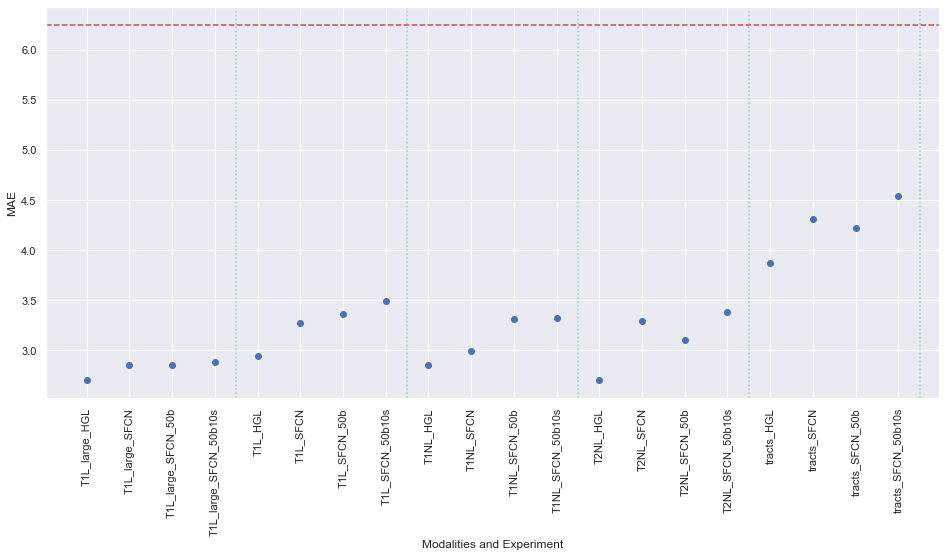

In [197]:
df_test = {}
array = []
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_age_delta.to_list()
    df_test[name] = np.abs(np.array(data)).mean()
    array.append(np.abs(np.array(data)).mean())
    
# df_test = pd.DataFrame.from_dict(df_test)

array = np.array(array)

fig = plt.figure(figsize=(16, 7.2))
# plt.scatter(np.arange(1, len(array), 1), array);
plt.scatter(np.arange(1, array.shape[0]+1), array)
plt.xticks(np.arange(1, array.shape[0]+1), df_test.keys(), rotation=90);

plt.xlabel("Modalities and Experiment")
plt.ylabel("MAE")
plt.axvline(x=4.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=8.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=12.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=16.5, color='g', linestyle='dotted', alpha=0.5);
plt.axvline(x=20.5, color='g', linestyle='dotted', alpha=0.5);
plt.axhline(y=6.253, color='r', linestyle='dashed')

# Test what happens if debiasing before deconfounding

In [200]:
# dfs[0]

In [201]:
# for idx in range(len(dfs)):
#     dfs[idx]['output_age_decon_1'] = age_debiasing(dfs[idx].output_age_1, dfs[idx].target_age)
#     dfs[idx]['output_age_decon_2'] = age_debiasing(dfs[idx].output_age_2, dfs[idx].target_age) 
#     dfs[idx]['output_age_decon_3'] = age_debiasing(dfs[idx].output_age_3, dfs[idx].target_age) 
#     dfs[idx]['mean_output_age_decon'] = dfs[idx][['output_age_decon_1', 'output_age_decon_2', 'output_age_decon_3']].mean(axis=1)
#     dfs[idx]['mean_age_delta_decon'] = dfs[idx]['mean_output_age_decon'] - dfs[idx]['target_age']

In [202]:
# dfs[0]

In [203]:
# print("{:13} : {:14}  |  {:14}  |  {:13}  |   {:13}  |  {:}  |  {:} ".format('Modality', 'MAE (DECON)', 'MAE (DECON B)', "MSE (DECON)", "MSE (DECON B)",  "PR (DECON)", "PR (DECON B)"))
# print('-----------------------------------------------------------------------------------------------')

# for idx in range(len(dfs)):
#     print("{:13} :  {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f} ± {:.3f}  |   {:.3f} ± {:.3f}   |   {:.3f}   |   {:.3f} ".format(
#         names[idx],
        
#         np.abs(dfs[idx].age_delta_decon).mean(), np.abs(dfs[idx].age_delta_decon).std()/np.sqrt(len(dfs[idx])),
#         np.abs(dfs[idx].mean_age_delta_decon).mean(), np.abs(dfs[idx].mean_age_delta_decon).std()/np.sqrt(len(dfs[idx])),
        
#         np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).mean(), np.square(np.subtract(dfs[idx].target_age, dfs[idx].output_age_decon)).std()/np.sqrt(len(dfs[idx])),
#         np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age_decon)).mean(), np.square(np.subtract(dfs[idx].target_age, dfs[idx].mean_output_age_decon)).std()/np.sqrt(len(dfs[idx])),
        
#         pearsonr(dfs[idx].target_age, dfs[idx].output_age_decon)[0],
#         pearsonr(dfs[idx].target_age, dfs[idx].mean_output_age_decon)[0],
#     )
#          )